In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [2]:
data=pd.read_excel('Airline.xlsx')

In [3]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data.shape

(10683, 11)

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
data.shape

(10682, 11)

In [12]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [13]:
data['Additional_Info'].value_counts().reset_index()

,index,Additional_Info
0,No info,8344
1,In-flight meal not included,1982
2,No check-in baggage included,320
3,1 Long layover,19
4,Change airports,7
5,Business class,4
6,No Info,3
7,1 Short layover,1
8,Red-eye flight,1
9,2 Long layover,1


In [14]:
data.drop('Additional_Info',inplace=True,axis=1)

In [15]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Price               int64
dtype: object

In [16]:
data['Total_Stops'].value_counts().reset_index()

,index,Total_Stops
0,1 stop,5625
1,non-stop,3491
2,2 stops,1520
3,3 stops,45
4,4 stops,1


In [17]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [18]:
data['Total_Stops']=data['Total_Stops'].map({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [19]:
data['Total_Stops']=data['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [20]:
data['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [21]:
data['Total_Stops']=data['Total_Stops'].replace({i:j for i,j in zip(['non-stop','2 stops','1 stop','3 stops','4 stops'],[0,2,1,3,4])})

In [22]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int64
Price               int64
dtype: object

In [23]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'],infer_datetime_format=True)

In [24]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                 int64
Price                       int64
dtype: object

In [25]:
data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,12648
10682,Air India,2019-05-09,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2,11753


In [26]:
def to_df(df,column):
    df[column]=pd.to_datetime(df[column],infer_datetime_format=True)

In [27]:
for i in ['Dep_Time','Arrival_Time']:
    to_df(data,i)

In [28]:

data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-10-18 22:20:00,2024-03-22 01:10:00,2h 50m,0,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-10-18 05:50:00,2024-10-18 13:15:00,7h 25m,2,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-10-18 09:25:00,2024-06-10 04:25:00,19h,2,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-10-18 18:05:00,2024-10-18 23:30:00,5h 25m,1,6218


In [29]:
data['Journey_Date']=data['Date_of_Journey'].dt.day
data['Journey_month']=data['Date_of_Journey'].dt.month
data['Dep_hr']=data['Dep_Time'].dt.hour
data['Dep_minute']=data['Dep_Time'].dt.minute
data['Arrival_hr']=data['Arrival_Time'].dt.hour
data['arrival_minute']=data['Arrival_Time'].dt.minute

In [30]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_month,Dep_hr,Dep_minute,Arrival_hr,arrival_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-10-18 22:20:00,2024-03-22 01:10:00,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-10-18 05:50:00,2024-10-18 13:15:00,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-10-18 09:25:00,2024-06-10 04:25:00,19h,2,13882,9,6,9,25,4,25


In [31]:
#

In [32]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    data.drop(i,axis=1,inplace=True)

In [33]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_Date,Journey_month,Dep_hr,Dep_minute,Arrival_hr,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,13882,9,6,9,25,4,25


In [34]:
data.dtypes

Airline           object
Source            object
Destination       object
Route             object
Duration          object
Total_Stops        int64
Price              int64
Journey_Date       int64
Journey_month      int64
Dep_hr             int64
Dep_minute         int64
Arrival_hr         int64
arrival_minute     int64
dtype: object

In [35]:
a='2h 50m'

In [36]:
int(a[0].split('h')[0])

2

In [37]:
int(a[0].strip('h')[0])

2

In [38]:
int(a[0].removesuffix('h')[0])

2

In [39]:
a='12h 50m'

In [40]:
a1=a.split(' ')

In [41]:
a1

['12h', '50m']

In [42]:
int(a1[0][0:-1])

12

In [43]:
len(data['Duration'])

10682

In [44]:
len(data['Duration'].str.split(' '))

10682

In [45]:
duration=[]
for i in data['Duration']:
    if len(i.split(' '))!=2:
        if 'h' in i:
            duration.append(i+' 0m')
        else:
            duration.append(i+' 0h')
    else:
        duration.append(i)

In [46]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [47]:
data['Duration']=duration

In [48]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_Date,Journey_month,Dep_hr,Dep_minute,Arrival_hr,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,9,25,4,25


In [49]:
def hr(x):
    return int(x.split(' ')[0][0:-1])
def minute(x):
    return int(x.split(' ')[1][0][-1])

In [50]:
data['duration_min']=data['Duration'].apply(hr)
data['duration-hr']=data['Duration'].apply(minute)

In [51]:
data.dtypes

Airline           object
Source            object
Destination       object
Route             object
Duration          object
Total_Stops        int64
Price              int64
Journey_Date       int64
Journey_month      int64
Dep_hr             int64
Dep_minute         int64
Arrival_hr         int64
arrival_minute     int64
duration_min       int64
duration-hr        int64
dtype: object

In [52]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_Date,Journey_month,Dep_hr,Dep_minute,Arrival_hr,arrival_minute,duration_min,duration-hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15,7,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,9,25,4,25,19,0


In [53]:
data.drop('Duration',axis=1,inplace=True)

In [54]:
data.dtypes

Airline           object
Source            object
Destination       object
Route             object
Total_Stops        int64
Price              int64
Journey_Date       int64
Journey_month      int64
Dep_hr             int64
Dep_minute         int64
Arrival_hr         int64
arrival_minute     int64
duration_min       int64
duration-hr        int64
dtype: object

In [55]:
data[['Airline','Source','Destination','Route']]

,Airline,Source,Destination,Route
0,IndiGo,Banglore,New Delhi,BLR → DEL
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL
...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR
10679,Air India,Kolkata,Banglore,CCU → BLR
10680,Jet Airways,Banglore,Delhi,BLR → DEL
10681,Vistara,Banglore,New Delhi,BLR → DEL


In [56]:
cat_data=[x for x in data.columns if data[x].dtypes=='O']

In [57]:
con_data=[x for x in data.columns if data[x].dtypes!='O']

In [58]:
cat_data

['Airline', 'Source', 'Destination', 'Route']

In [59]:
cat=data[cat_data]

In [60]:
cat.head(4)

,Airline,Source,Destination,Route
0,IndiGo,Banglore,New Delhi,BLR → DEL
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR


In [61]:
con=data[con_data]

In [62]:
con.head(3)

,Total_Stops,Price,Journey_Date,Journey_month,Dep_hr,Dep_minute,Arrival_hr,arrival_minute,duration_min,duration-hr
0,0,3897,24,3,22,20,1,10,2,5
1,2,7662,1,5,5,50,13,15,7,2
2,2,13882,9,6,9,25,4,25,19,0


In [63]:
cat['Airline'].nunique()

12

In [64]:
Airline=pd.get_dummies(cat['Airline'])

In [65]:
Airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0


In [66]:
cat['Source'].nunique()

5

In [67]:
Source=pd.get_dummies(cat['Source'])

In [68]:
Source

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [69]:
Destination=pd.get_dummies(cat['Destination'])

In [70]:
Destination

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
10678,1,0,0,0,0,0
10679,1,0,0,0,0,0
10680,0,0,1,0,0,0
10681,0,0,0,0,0,1


In [71]:
for i in ['Airline','Source','Destination']:
    data.drop(i,axis=1,inplace=True)

In [72]:
data.columns

Index(['Route', 'Total_Stops', 'Price', 'Journey_Date', 'Journey_month',
       'Dep_hr', 'Dep_minute', 'Arrival_hr', 'arrival_minute', 'duration_min',
       'duration-hr'],
      dtype='object')

In [73]:
data.isnull().sum()

Route             0
Total_Stops       0
Price             0
Journey_Date      0
Journey_month     0
Dep_hr            0
Dep_minute        0
Arrival_hr        0
arrival_minute    0
duration_min      0
duration-hr       0
dtype: int64

In [74]:
cat['Route'].sample()

4035    BOM → HYD
Name: Route, dtype: object

In [75]:
a='CCU → DEL → BLR'

In [76]:
a.split('→')

['CCU ', ' DEL ', ' BLR']

In [77]:
Route=pd.DataFrame()

In [78]:
Route['Route_1']=cat['Route'].str.split(' → ').str[0]

In [79]:
Route

,Route_1
0,BLR
1,CCU
2,DEL
3,CCU
4,BLR
...,...
10678,CCU
10679,CCU
10680,BLR
10681,BLR


In [80]:
for i in range(1,6):
    Route['Route_'+str(i+1)]=cat['Route'].str.split(' → ').str[i]

In [81]:
Route.head(3)

,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,BLR,DEL,NaN,NaN,NaN,NaN
1,CCU,IXR,BBI,BLR,NaN,NaN
2,DEL,LKO,BOM,COK,NaN,NaN


In [82]:
Route['Route_5'].value_counts().reset_index()

,index,Route_5
0,COK,25
1,BLR,11
2,DEL,7
3,HYD,2
4,VGA,1


In [83]:
Route.isnull().sum()

Route_1        0
Route_2        0
Route_3     3491
Route_4     9116
Route_5    10636
Route_6    10681
dtype: int64

In [84]:
for i in['Route_5','Route_6']:
    Route.drop(i,axis=1,inplace=True)

In [85]:
Route

,Route_1,Route_2,Route_3,Route_4
0,BLR,DEL,NaN,NaN
1,CCU,IXR,BBI,BLR
2,DEL,LKO,BOM,COK
3,CCU,NAG,BLR,NaN
4,BLR,NAG,DEL,NaN
...,...,...,...,...
10678,CCU,BLR,NaN,NaN
10679,CCU,BLR,NaN,NaN
10680,BLR,DEL,NaN,NaN
10681,BLR,DEL,NaN,NaN


In [86]:
Route.isnull().sum()

Route_1       0
Route_2       0
Route_3    3491
Route_4    9116
dtype: int64

In [87]:
for i in ['Route_3','Route_4']:
    Route[i].fillna('None',inplace=True)

In [88]:
for i in ['Route_3','Route_4']:
    Route[i].ffill(inplace=True)

In [89]:
Route.head(3)

,Route_1,Route_2,Route_3,Route_4
0,BLR,DEL,None,None
1,CCU,IXR,BBI,BLR
2,DEL,LKO,BOM,COK


In [90]:
data.drop('Route',axis=1,inplace=True)

In [91]:
data.head(3)

,Total_Stops,Price,Journey_Date,Journey_month,Dep_hr,Dep_minute,Arrival_hr,arrival_minute,duration_min,duration-hr
0,0,3897,24,3,22,20,1,10,2,5
1,2,7662,1,5,5,50,13,15,7,2
2,2,13882,9,6,9,25,4,25,19,0


In [92]:
for i in Route.columns:
    print(i,'-',Route[i].nunique())

Route_1 - 5
Route_2 - 40
Route_3 - 27
Route_4 - 12


In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
le=LabelEncoder()

In [95]:

for i in Route.columns:
    Route[i]=le.fit_transform(Route[i])

In [96]:
Route

,Route_1,Route_2,Route_3,Route_4
0,0,10,21,10
1,2,20,1,3
2,3,27,4,5
3,2,29,3,10
4,0,29,7,10
...,...,...,...,...
10678,2,5,21,10
10679,2,5,21,10
10680,0,10,21,10
10681,0,10,21,10


In [97]:
Route.isnull().sum()

Route_1    0
Route_2    0
Route_3    0
Route_4    0
dtype: int64

In [98]:
new_data=pd.concat([data,Airline,Source,Destination,Route],axis=1)

In [99]:
new_data.head(3)

,Total_Stops,Price,Journey_Date,Journey_month,Dep_hr,Dep_minute,Arrival_hr,arrival_minute,duration_min,duration-hr,...,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Route_1,Route_2,Route_3,Route_4
0,0,3897,24,3,22,20,1,10,2,5,...,0,0,0,0,0,1,0,10,21,10
1,2,7662,1,5,5,50,13,15,7,2,...,1,0,0,0,0,0,2,20,1,3
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,0,3,27,4,5


In [100]:
new_data.shape

(10682, 37)

In [101]:
new_data.isnull().sum()

Total_Stops                          0
Price                                0
Journey_Date                         0
Journey_month                        0
Dep_hr                               0
Dep_minute                           0
Arrival_hr                           0
arrival_minute                       0
duration_min                         0
duration-hr                          0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Banglore                             0
Chennai                              0
Delhi                                0
Kolkata                  

In [102]:
data=pd.read_excel('Airline.xlsx')

<Axes: xlabel='Source', ylabel='Price'>

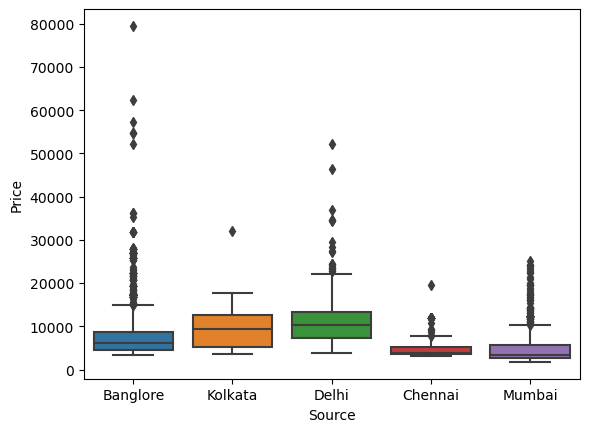

In [103]:
sns.boxplot(x=data['Source'],y=data['Price'])

In [104]:
data['Price']=np.where(data['Price']>=40000,data['Price'].median(),data['Price'])

<Axes: xlabel='Source', ylabel='Price'>

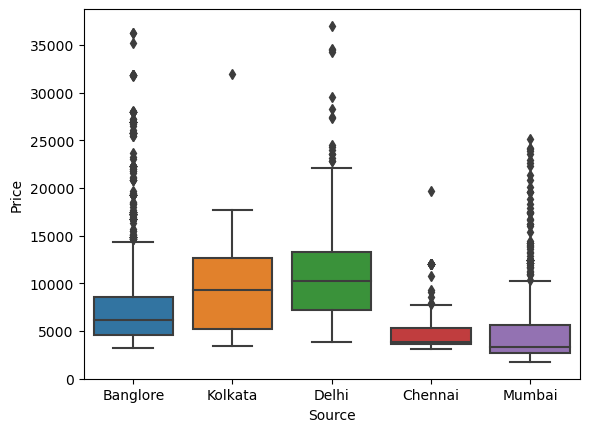

In [105]:
sns.boxplot(x=data['Source'],y=data['Price'])

In [106]:
data['Price']=np.where(data['Price']>=40000,data['Price'].mean(),data['Price'])

<Axes: xlabel='Source', ylabel='Price'>

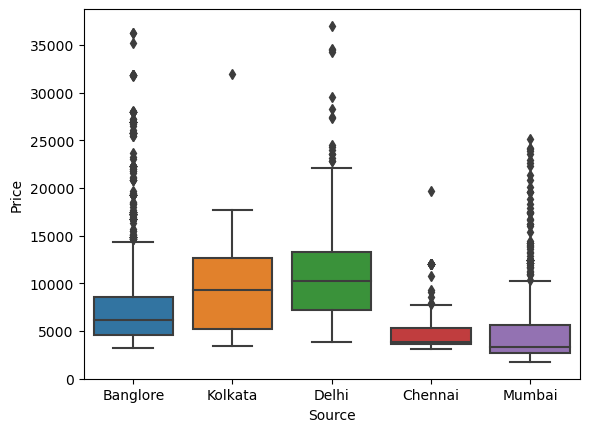

In [107]:
sns.boxplot(x=data['Source'],y=data['Price'])

In [125]:
X=new_data.drop('Price',axis=1)

In [126]:
y=new_data['Price']

In [158]:
from sklearn.model_selection  import train_test_split

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

In [159]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [130]:
RFG=GradientBoostingRegressor()

In [131]:
y_pred= RFG.fit(X_train,y_train)

In [134]:
RFG.score(X_train,y_train)

0.7987521130570472

In [135]:
y_prediction=RFG.predict(X_test)

In [140]:
from sklearn.metrics import r2_score

In [141]:
mae=r2_score(y_test,y_prediction)

In [142]:
mae

0.7720201069739785

In [139]:
y_prediction

array([11588.24458933, 10154.97669079, 11946.66856644, ...,
        5300.44758444, 13308.39164246, 13132.56096585])

In [149]:
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.ensemble import RandomForestRegressor


In [180]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8545, 36)
(2137, 36)
(8545,)
(2137,)


In [167]:
model=RandomForestRegressor()
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10]
}

In [170]:
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,n_jobs=-1,verbose=2)

In [171]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [177]:
best_param=grid_search.best_params_
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)
print("Best parameters:",best_param)
print('r2_score',r2_score(y_test,y_pred))



Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
r2_score 0.8621441361507728


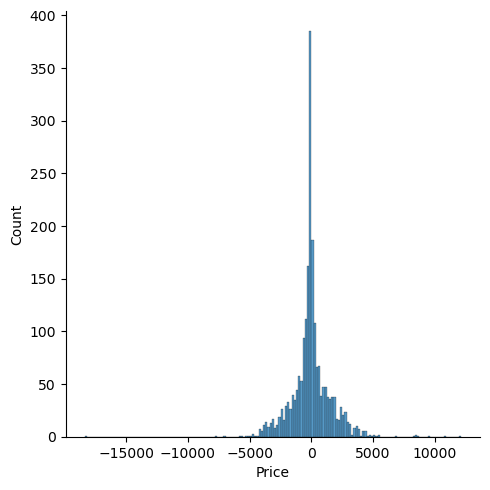

In [175]:
sns.displot(y_test-y_pred)